<h1><center>Nigeria COVID-19 Data Analysis using Python</center></h1>

<img src="covid.png" width="300" height="100">

### Overview

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus, and it has affected significant parts of the world, Nigeria included. In this project, you will employ data science & analytics skills to collect data from different sources, combine and explore the data, perform analysis, create visualizations, and generate insights. 

You have data that includes but not limited to confirmed, death, recovered & active cases, economic, and vulnerability index data. The goal of this project is to answer real-world questions by considering an in-depth analytical approach.  

## Task 1 - Data Collection

Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the JoHn Hopkins repository, and import the provided external data.

### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Assign the url of the webpage to a variable
url = 'https://covid19.ncdc.gov.ng/'

#Assign the result of a request of the webpage to a variable using requests.get() method
response = requests.get(url)

#Get the status_code of the feedback. 
#Status_code that begins with 2 generally indicate success.
print(response.status_code)

200


In [3]:
#Read the text-based contents of the web files
#To make the text more readable than the way it comes from the request modules, 
#BeautifulSoup module will be used to parse data from the html files
soup = BeautifulSoup(response.text,"html.parser")

In [4]:
#Extract from the web file, table with id:custom1 using BeautifulSoup's findAll() method
table = soup.findAll('table',{"id":"custom1"})[0]
values =[]

In [5]:
#Extract the table rows from the table with list 'tr' argument in table.findAll() method
tr = table.findAll(['tr'])

In [6]:
#Create a csv file 'nig_covid.csv' and open in append mode
csvFile = open("nig_covid.csv",'wt',newline='',encoding='utf-8')

#Write the extracted data to the file using the .writer()method
writer = csv.writer(csvFile)  

#Use for loop to extract all the table_head 'th' and table_data 'td' from the table
#Remove the newline in the text column of 'th' using strip() method
#Replace the newline in 'td' with space(' ') using replace() method
#Write data into the file with writereow() method
try:
    for cell in tr:
        th = cell.find_all('th')
        th_data = [col.text.strip('\n') for col in th]
        td = cell.find_all('td')
        row = [i.text.replace('\n','') for i in td]
        writer.writerow(th_data+row) 
        
#Close the csvFile from append mode
finally:
    csvFile.close()

In [7]:
# Save the data to a DataFrame object.
dfnig = pd.read_csv('nig_covid.csv')

#### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below.

- Global Daily Confirmed Cases - Click [here]('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
- Global Daily Recovered Cases - Click [here]('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
- Global Daily Death Cases - Click [here]('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [8]:
#df1
confirmed_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed_global = pd.read_csv(confirmed_global)

#df2
recovered_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_recovered_global = pd.read_csv(recovered_global)

#df3
deaths_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_deaths_global = pd.read_csv(deaths_global)


## C - External Data
Save the external data to a DataFrame

In [19]:
df_external = pd.read_csv('covid_external.csv')

In [20]:
df_budget = pd.read_csv('Budget data.csv')

In [21]:
df_readgdp = pd.read_csv('RealGDP.csv')

## Task 2 - View the data
Obtain basic information about the data using the head() and info() method.

In [22]:
dfnig.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,...,"57,081 ...",341,"56,315 ...",425
1,...,"19,490 ...","3,713","15,621 ...",156
2,...,"8,995",78,"8,860",57
3,...,"8,825",130,"8,630",65
4,...,"6,831",204,"6,529",98


In [23]:
dfnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
States Affected                 37 non-null object
No. of Cases (Lab Confirmed)    37 non-null object
No. of Cases (on admission)     37 non-null object
No. Discharged                  37 non-null object
No. of Deaths                   37 non-null int64
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [24]:
df_confirmed_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489


In [25]:
df_recovered_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,49402,49409,49499,49499,49499,49471,49477,49481,49499,49536
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,75887,76784,77498,78259,79131,79821,80483,81061,81810,82554
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,79187,79319,79428,79556,79672,79783,79887,79994,80103,80219
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10661,10685,10708,10708,10754,10775,10796,10795,10861,10883
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19657,19677,19761,19827,19835,19848,19850,19948,19971,20028


In [26]:
df_deaths_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2451,2451,2451,2451,2454,2454,2457,2459,2460,2460
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1956,1969,1986,2002,2018,2030,2045,2060,2077,2092
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3018,3022,3026,3028,3031,3034,3036,3040,3045,3048
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,112,112,112,112,112,112,113,113,113,113
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,515,516,516,517,519,520,521,521,522,522


In [27]:
df_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,1.0,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,1.0,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.9,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.9,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.9,0.1,0.8,0.8,0.84


In [28]:
df_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
states                     37 non-null object
region                     37 non-null object
Population                 37 non-null int64
Overall CCVI Index         37 non-null float64
Age                        37 non-null float64
Epidemiological            37 non-null float64
Fragility                  37 non-null float64
Health System              37 non-null float64
Population Density         37 non-null float64
Socio-Economic             37 non-null float64
 Transport Availability    37 non-null float64
Acute IHR                  37 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


## Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format.
Examples:

- Convert to appropriate data type.
- Rename the columns of the scraped data.
- Remove comma(,) in numerical data
- Extract daily data for Nigeria from the Global daily cases data


TODO A - Clean the scraped data

In [29]:
dfnig.columns = ['states', 'cases_lab_confirmed', 'cases_on_admission', 'discharged', 'deaths']

In [30]:
dfnig.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths
0,...,"57,081 ...",341,"56,315 ...",425
1,...,"19,490 ...","3,713","15,621 ...",156
2,...,"8,995",78,"8,860",57
3,...,"8,825",130,"8,630",65
4,...,"6,831",204,"6,529",98


In [31]:
# Remove the extra white spaces and comma then convert 'cases_lab_confirmed', 'cases_on_admission', 'discharged' to numeric
dfnig = dfnig.replace({',':'', ' ':''}, regex=True)
a = dfnig[['cases_lab_confirmed', 'cases_on_admission', 'discharged']].columns
dfnig[a] = dfnig[a].apply(pd.to_numeric,errors='coerce')

In [32]:
dfnig.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths
0,Lagos,57081,341,56315,425
1,FCT,19490,3713,15621,156
2,Plateau,8995,78,8860,57
3,Kaduna,8825,130,8630,65
4,Rivers,6831,204,6529,98


In [33]:
dfnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
states                 37 non-null object
cases_lab_confirmed    37 non-null int64
cases_on_admission     37 non-null int64
discharged             37 non-null int64
deaths                 37 non-null int64
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [34]:
df_confirmed_global = df_confirmed_global.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [35]:
confirmed_nig = df_confirmed_global.groupby('Country/Region').sum().loc['Nigeria']

In [36]:
confirmed_nig = confirmed_nig.to_frame().reset_index()

In [37]:
confirmed_nig.columns = ['Date', 'Cases']
confirmed_nig['Date'] = pd.to_datetime(confirmed_nig['Date'])
confirmed_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 2 columns):
Date     421 non-null datetime64[ns]
Cases    421 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.7 KB


In [38]:
confirmed_nig.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [39]:
df_recovered_global = df_recovered_global.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [40]:
recovered_nig = df_recovered_global.groupby('Country/Region').sum().loc['Nigeria']

In [41]:
recovered_nig = recovered_nig.to_frame().reset_index()

In [42]:
recovered_nig

,index,Nigeria
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
416,3/13/21,144714
417,3/14/21,145399
418,3/15/21,145752
419,3/16/21,146072


In [43]:
# change the columns to 'Date' and 'Cases'
recovered_nig.columns = ['Date', 'Cases']

#convert Date column to datetimd
recovered_nig['Date'] = pd.to_datetime(recovered_nig['Date'])
recovered_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 2 columns):
Date     421 non-null datetime64[ns]
Cases    421 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.7 KB


In [44]:
# Check the last few rows
recovered_nig.tail()

,Date,Cases
416,2021-03-13,144714
417,2021-03-14,145399
418,2021-03-15,145752
419,2021-03-16,146072
420,2021-03-17,146395


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [45]:
# Just like the Dily Recovered Cases
df_deaths_global = df_deaths_global.drop(['Province/State', 'Lat', 'Long'], axis=1)
deaths_nig = df_deaths_global.groupby('Country/Region').sum().loc['Nigeria']
deaths_nig = deaths_nig.to_frame().reset_index()
deaths_nig.columns = ['Date', 'Cases']
deaths_nig['Date'] = pd.to_datetime(deaths_nig['Date'])
deaths_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 2 columns):
Date     421 non-null datetime64[ns]
Cases    421 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.7 KB


In [46]:
deaths_nig.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


## Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary.
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

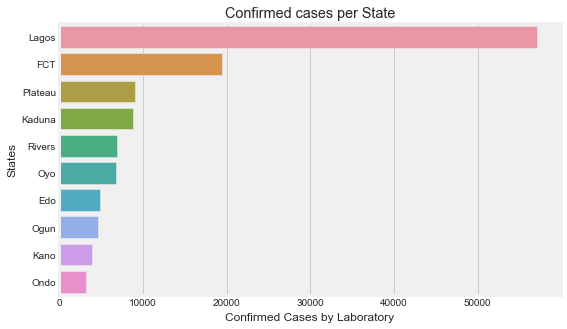

In [50]:
data = dfnig.nlargest(10, 'cases_lab_confirmed')
fig = plt.figure(figsize=(8, 5))
ax = sns.barplot(x='cases_lab_confirmed', y='states', data=data[['states', 'cases_lab_confirmed']])
ax.set_title('Confirmed cases per State')
ax.set_xlabel('Confirmed Cases by Laboratory')
ax.set_ylabel('States');

Top 3 States - Lagos, FCT and Plateau

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

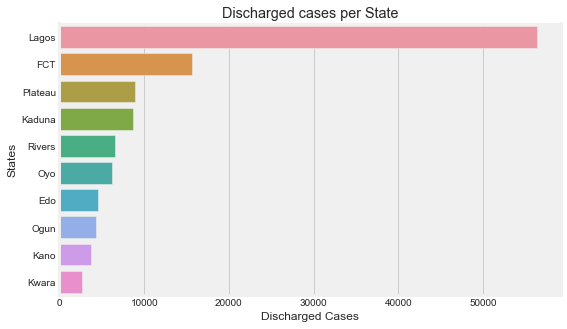

In [51]:
fig = plt.figure(figsize=(8, 5))
ax = sns.barplot(x='discharged', y='states', data=dfnig[['states', 'discharged']].sort_values(by=['discharged'],ascending=False).loc[:10])
ax.set_xlabel('Discharged Cases')
ax.set_title('Discharged cases per State')
ax.set_ylabel('States');

Cases on admission represents the active cases in each states. Let's determine the states with high values of active cases.


TODO C: Plot the top 10 active cases

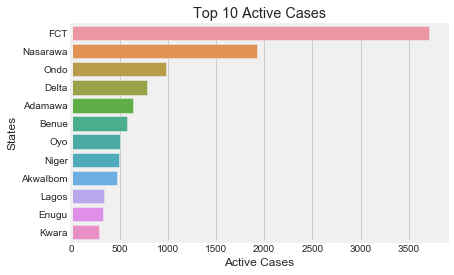

In [52]:
ax = sns.barplot(x='cases_on_admission', y='states', data=dfnig[['states', 'cases_on_admission']].sort_values(by=['cases_on_admission'],ascending=False).loc[:10])
ax.set_xlabel('Active Cases')
ax.set_title('Top 10 Active Cases')
ax.set_ylabel('States');

From the chart above, you will discover that FCT has the highest number of active cases, even though Lagos has the highest number of confirmed cases.

TODO D - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

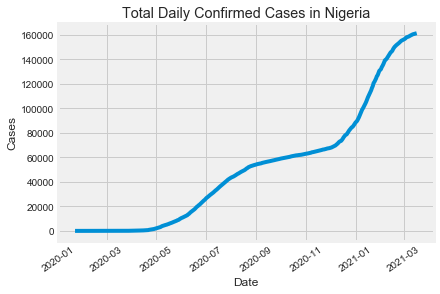

In [53]:
sns.lineplot(x="Date", y="Cases", data=confirmed_nig)
plt.xticks(rotation=35)
plt.title('Total Daily Confirmed Cases in Nigeria')
plt.show()

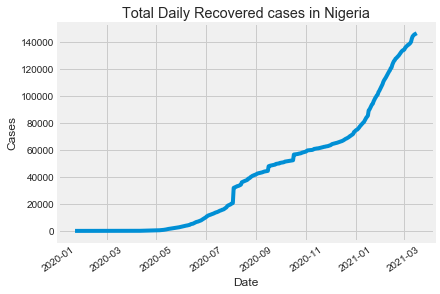

In [55]:
sns.lineplot(x="Date", y="Cases", data=recovered_nig)
plt.xticks(rotation=35)
plt.title('Total Daily Recovered cases in Nigeria')
plt.show()

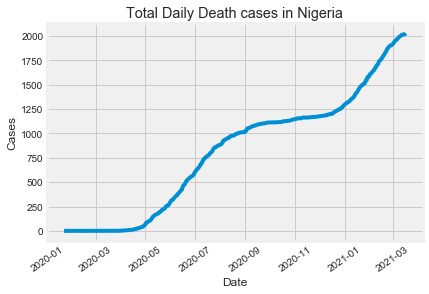

In [56]:
sns.lineplot(x="Date", y="Cases", data=deaths_nig)
plt.xticks(rotation=35)
plt.title('Total Daily Death cases in Nigeria')
plt.show()


TODO E -

Determine the daily infection rate, you can use the Pandas diff method to find the derivate of the total cases.
Generate a line plot for the above

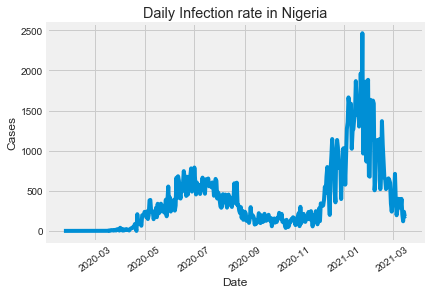

In [57]:
y = confirmed_nig['Cases'].diff()
sns.lineplot(x="Date", y=y, data=confirmed_nig)
plt.xticks(rotation=35)
plt.title('Daily Infection rate in Nigeria')
plt.show()

The maximum figure can be observed to be around late January 2021. It is really important that people continue keep to the preventive measures during this period.

TODO F -

Calculate maximum infection rate for a day (Number of new cases)

Find the date

In [66]:
y.max()

2464.0

In [58]:
confirmed_nig['IFR'] = confirmed_nig['Cases'].diff()
confirmed_nig.loc[confirmed_nig['IFR'] == y.max()]

,Date,Cases,IFR
367,2021-01-23,120602,2464.0



The maximum infection rate was recorded on 23rd of January, 2021. Meaning there were 2464 new cases on that day. This result matches with the NCDC figures on their official Twitter account.

TODO G - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.

Steps

Combine the two dataset together on a common column(states)

Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. Hint: Check out Pandas nlargest function. This tutorial can help out

Plot both variable on the same axis. Check out this tutorial

In [59]:
df_join = pd.merge(dfnig, df_external, how='outer', on=['states'])

In [60]:
df_join.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,57081.0,341.0,56315.0,425.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,19490.0,3713.0,15621.0,156.0,North Central,4865000.0,0.3,0.0,0.9,0.4,1.0,0.9,0.6,0.2,0.79
2,Plateau,8995.0,78.0,8860.0,57.0,North Central,4766000.0,0.4,0.5,0.4,0.8,1.0,0.3,0.5,0.3,0.93
3,Kaduna,8825.0,130.0,8630.0,65.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.6,0.4,0.6,0.4,0.86
4,Rivers,6831.0,204.0,6529.0,98.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.3,0.9,0.1,0.1,1.00


In [61]:
df_tcases = df_join.nlargest(11, 'cases_lab_confirmed')

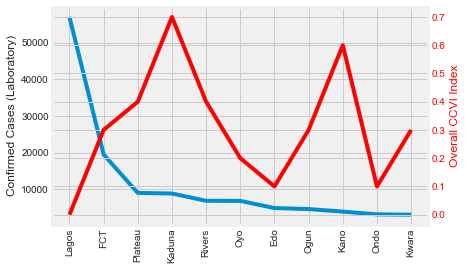

In [62]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_tcases['states'], df_tcases['cases_lab_confirmed'])
ax1.set_ylabel('Confirmed Cases (Laboratory)')
ax2 = ax1.twinx()
ax2.plot(df_tcases['states'], df_tcases['Overall CCVI Index'], 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.show()

#### Write Your Observation Here
##### Observation
You will notice that the states with the highest vulnerability index score in relation to the confirmed cases are Northern states with weak health systems, more poverty etc. Lagos has a high number of confirmed cases but has less vulnerability index score because of good health system, more social distancing etc.

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset.

- Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density. Hint: Check out Seaborn [Regression Plot]('https://seaborn.pydata.org/generated/seaborn.regplot.html').
- Provide a summary of your observation

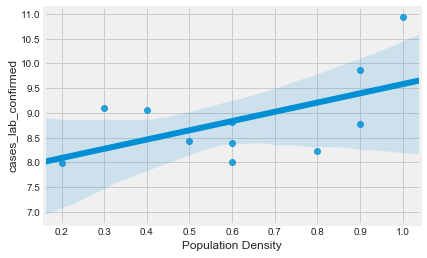

In [86]:
sns.regplot(df_tcases['Population Density'], np.log(df_tcases['cases_lab_confirmed']))

#### Observation
Confirmed cases and Population density have positive correlation. There are high cases in areas that are densely populated.

TODO J -

- Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
- Provide a detailed summary of your findings.
- Note that you can have as many as possible.

#### Impact on the Nigeria Economy


#### TODO K -Determine the effect of the Pandemic on the economy. A way to do this is to explore the initial and the revised budget (from budget data).

Steps

- Combine the budget data with your data on common column(states)
- Create a groupby object, by grouping by region and aggregating on Initial, Revised budget and confirmed cases. Sum is the aggregating function
- Determine the changes in budget(Initial - Revised)
- Check your groupby data or object, write down your observation. For example, what region has the highest reduction in budget and why is that?
- Generate a plot for your result. e.g barplot showing total reduction for each region.

In [64]:
df_join2 = pd.merge(df_join, df_budget, how='outer', on=['states'])

In [65]:
df_join2.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Initial_budget (Bn),Revised_budget (Bn)
0,Lagos,57081.0,341.0,56315.0,425.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,1680.00,920.5
1,FCT,19490.0,3713.0,15621.0,156.0,North Central,4865000.0,0.3,0.0,0.9,0.4,1.0,0.9,0.6,0.2,0.79,278.78,199.0
2,Plateau,8995.0,78.0,8860.0,57.0,North Central,4766000.0,0.4,0.5,0.4,0.8,1.0,0.3,0.5,0.3,0.93,177.30,122.0
3,Kaduna,8825.0,130.0,8630.0,65.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.6,0.4,0.6,0.4,0.86,259.25,223.6
4,Rivers,6831.0,204.0,6529.0,98.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.3,0.9,0.1,0.1,1.00,530.80,300.4


In [66]:
dfgroup = df_join2.groupby('region')['Initial_budget (Bn)', 'Revised_budget (Bn)', 'cases_lab_confirmed'].sum()

In [67]:
dfgroup['changes'] = abs(dfgroup['Revised_budget (Bn)'] - dfgroup['Initial_budget (Bn)'])

In [68]:
dfgroup

,Initial_budget (Bn),Revised_budget (Bn),cases_lab_confirmed,changes
region,,,,
North Central,1136.08,760.00,33648.0,376.08
North East,951.13,720.01,6943.0,231.12
North West,1385.07,1078.50,16705.0,306.57
South East,640.86,470.20,7380.0,170.66
South South,1526.08,1026.45,17076.0,499.63
South West,2774.80,1699.20,74937.0,1075.60


From the table, the south west region recorded the highest amount of confirmed cases, and also the highest amount of reduction in budget. This is because, the south west region experienced the longest duration of Lock-down, and as such was forced to shut down major economic activities. The effect is seen in budget reduction.

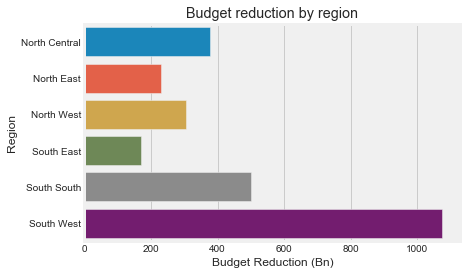

In [70]:
dfplot = dfgroup.reset_index()
y = dfplot['region']
ax = sns.barplot(x='changes', y=y, data=dfplot)
ax.set_xlabel('Budget Reduction (Bn)')
ax.set_title('Budget reduction by region')
ax.set_ylabel('Region');

#### TODO L -
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)



Steps

- From the Real GDP Data, generate a barplot using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph. 
    Hint: Use [Pandas.melt]('https://pandas.pydata.org/docs/reference/api/pandas.melt.html') to create your plot DataFrame
- Set your quarter legend to lower left.
- Using axhline, draw a horizontal line through the graph at the value of Q2 2020.
- Write out your observation

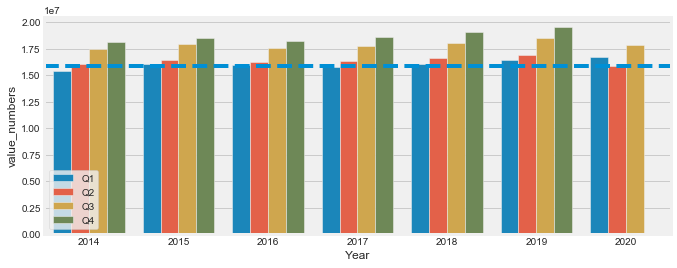

In [72]:
plt.figure(figsize=(10,4))
columns = ["Year", "Q1", "Q2", "Q3", "Q4"]
test_data_melted = pd.melt(df_readgdp, id_vars=columns[0],\
                           var_name="source", value_name="value_numbers")
g = sns.barplot(x=columns[0], y="value_numbers", hue="source",\
                data=test_data_melted)
plt.legend(loc='lower left')

g.axhline(1.589e7, ls='--')
plt.show()

#### Observation


The second Quarter (Q2) of 2020 has the lowest GDP compare to  Q2 from other years